# Credit Modelling

The problem statement for this machine learning project:

**Can we build a machine learning model that can accurately predict if a borrower will pay off their loan on time or not?**

Credit has played a key role in the economy for centuries and some form of credit has existed since the beginning of commerce. We'll be working with financial lending data from Lending Club. Lending Club is a marketplace for personal loans that matches borrowers who are seeking a loan with investors looking to lend money and make a return. 

Investors are primarily interested in receiving a return on their investments. Approved loans are listed on the Lending Club website, where qualified investors can browse recently approved loans, the borrower's credit score, the purpose for the loan, and other information from the application. Once they're ready to back a loan, they select the amount of money they want to fund. Once a loan's requested amount is fully funded, the borrower receives the money they requested minus the origination fee that Lending Club charges.

The borrower will make monthly payments back to Lending Club either over 36 months or over 60 months. Lending Club redistributes these payments to the investors. This means that investors don't have to wait until the full amount is paid off before they see a return in money. If a loan is fully paid off on time, the investors make a return which corresponds to the interest rate the borrower had to pay in addition to the requested amount. Many loans aren't completely paid off on time and some borrowers default on the loan.

## Data Exploration

We'll focus on approved loans data from 2007 to 2011, since a good number of the loans have already finished. In the datasets for later years, many of the loans are current and still being paid off. Since rejected applications don't appear on the Lending Club marketplace and aren't available for investment, we'll be focusing on approved loans. 

Data dictionary showing what a column represents in the datasets:

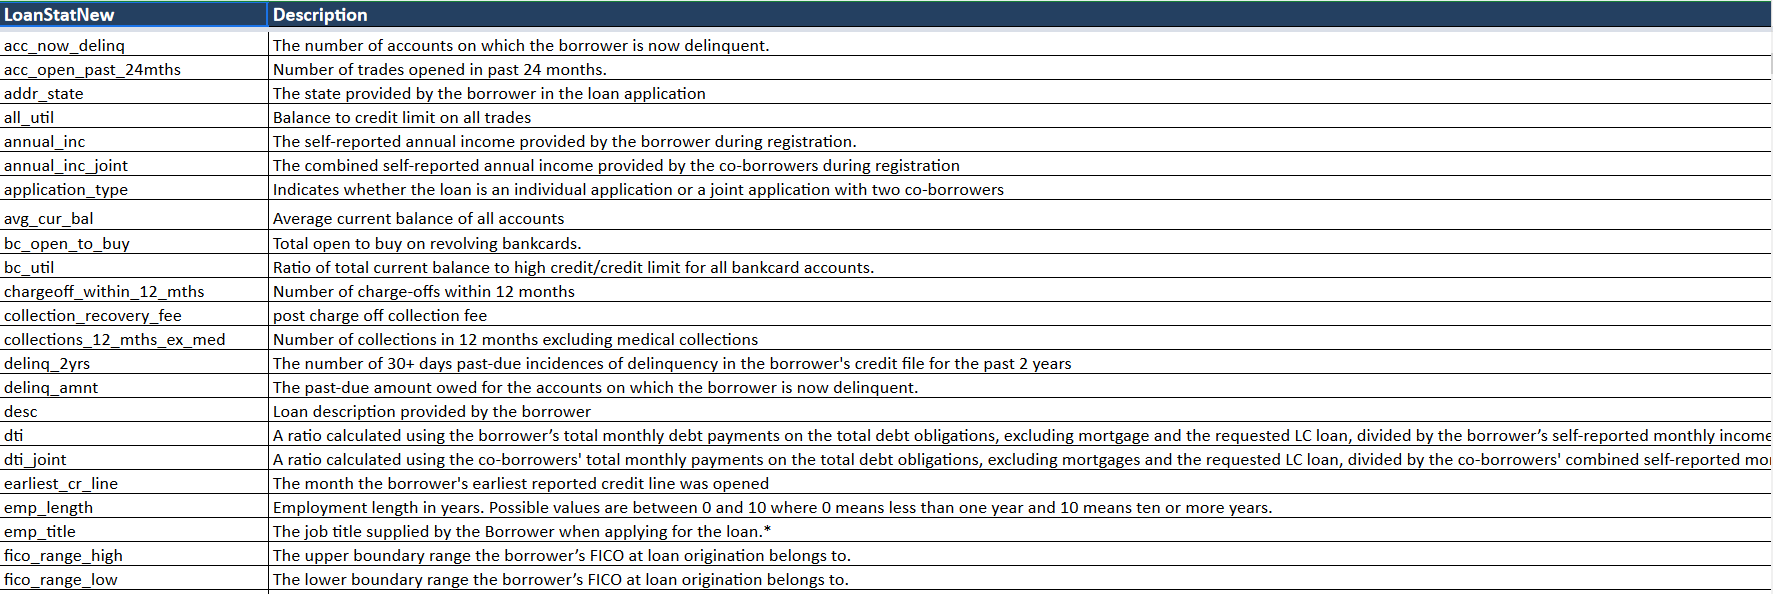

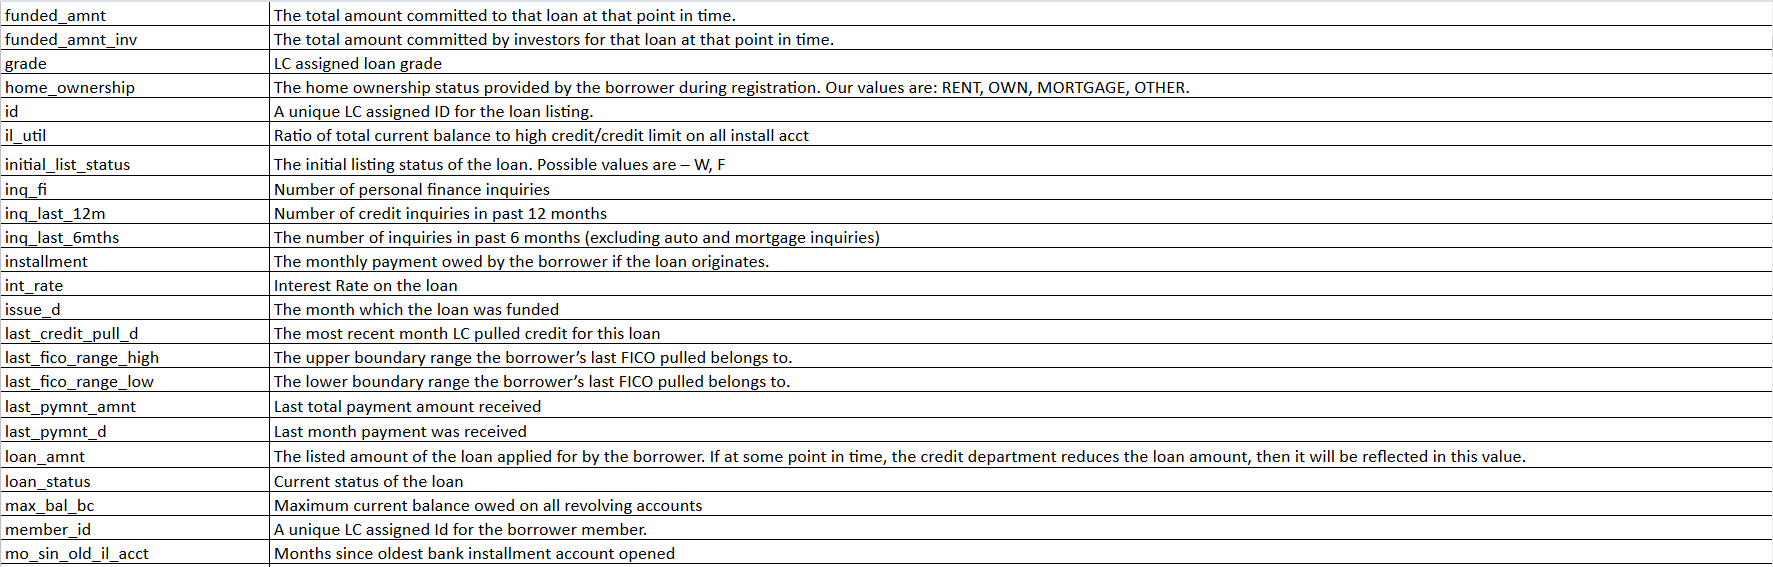

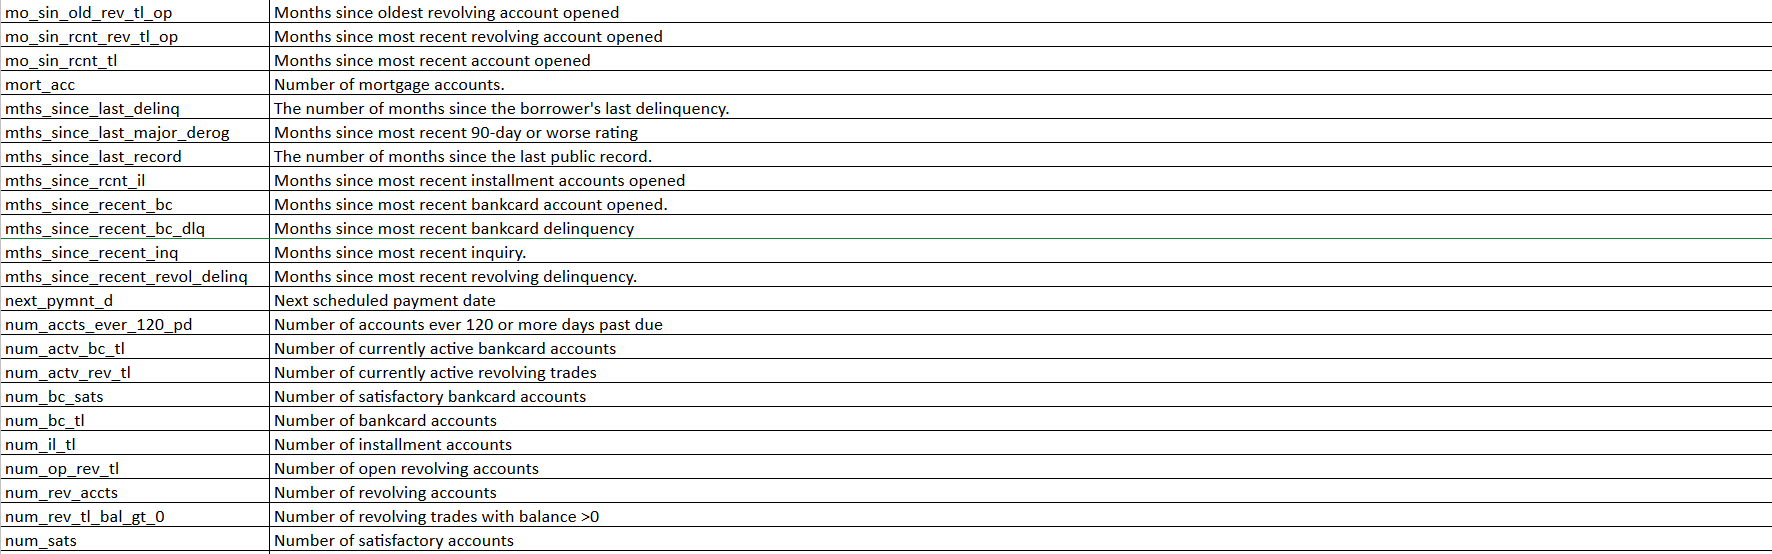

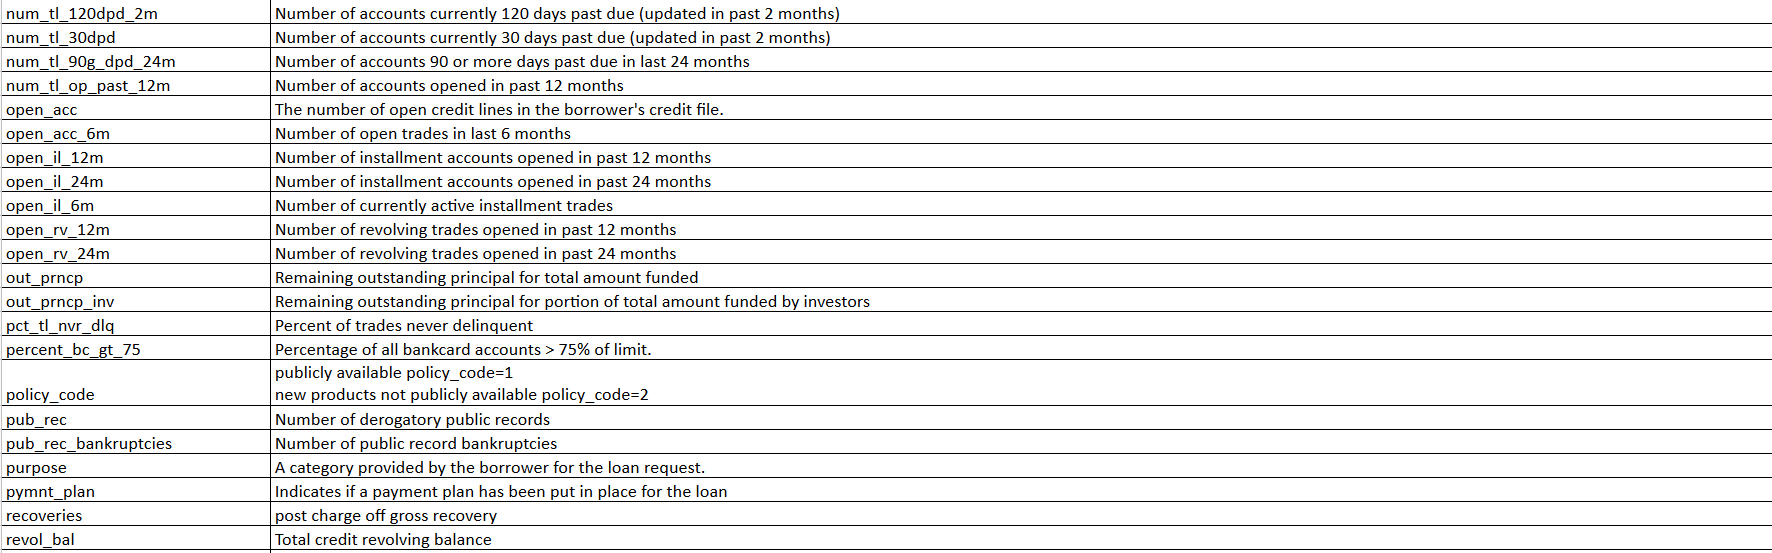

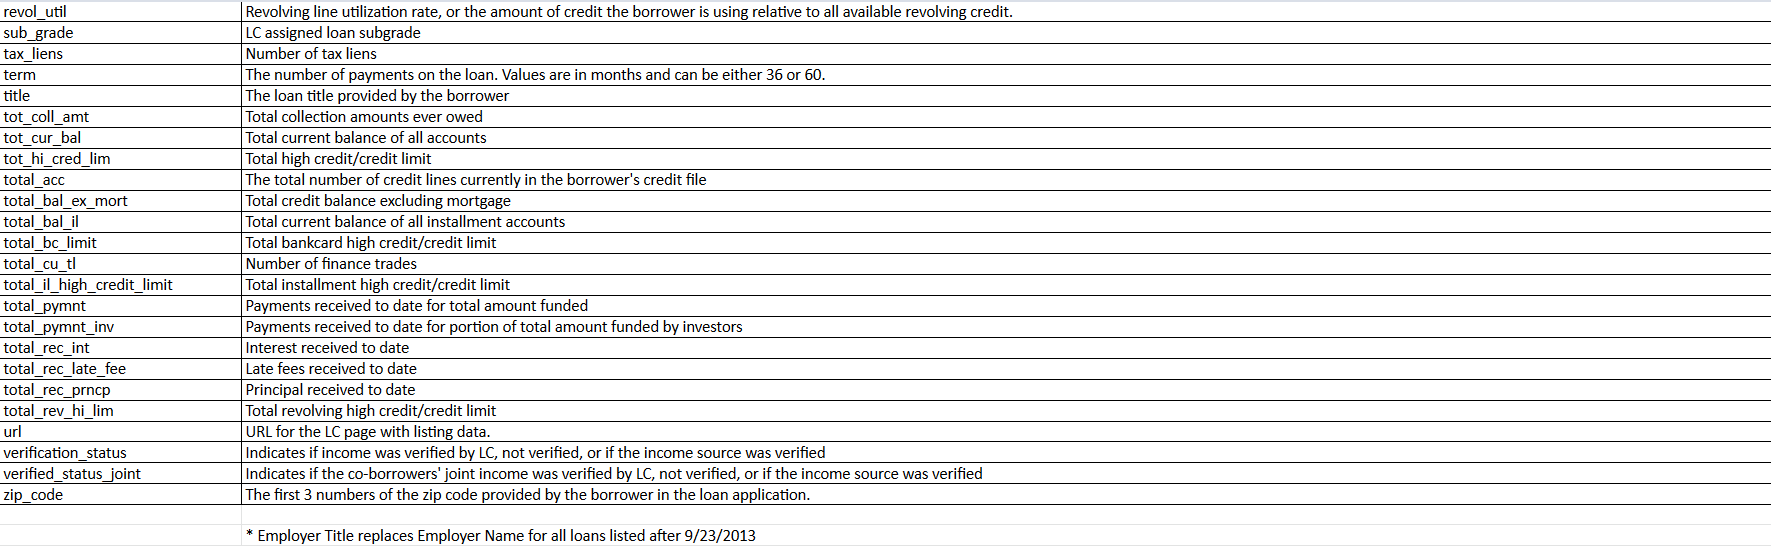

If we complete the following, we can reduce the size of the dataset for the ease of use:
* Remove the desc column:
  * which contains a long text explanation for each loan
* Remove the url column:
  * which contains a link to each loan on Lending Club which can only be accessed with an investor account
* Remove all columns containing more than 50% missing values:
  * which allows us to move faster since we can spend less time trying to fill these values

First, let's read the dataset into a Dataframe so we can start to explore the data and remaining features.

In [1]:
import pandas as pd
loans_2007 = pd.read_csv('loans_2007.csv')
loans_2007.drop_duplicates()
print(loans_2007.iloc[0])
print(loans_2007.shape[1])

C:\Users\Ibrahim\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


id                                1077501
member_id                       1296599.0
loan_amnt                          5000.0
funded_amnt                        5000.0
funded_amnt_inv                    4975.0
term                            36 months
int_rate                           10.65%
installment                        162.87
grade                                   B
sub_grade                              B2
emp_title                             NaN
emp_length                      10+ years
home_ownership                       RENT
annual_inc                        24000.0
verification_status              Verified
issue_d                          Dec-2011
loan_status                    Fully Paid
pymnt_plan                              n
purpose                       credit_card
title                            Computer
zip_code                            860xx
addr_state                             AZ
dti                                 27.65
delinq_2yrs                       

The Dataframe contains many columns and can be cumbersome to try to explore all at once. Let's separate the columns into 3 groups of 18 columns and use the data dictionary to become familiar with what each column represents. We need to look for any features that:
* disclose information from the future (after the loan has already been funded)
* don't affect a borrower's ability to pay back a loan (e.g. a randomly generated ID value by Lending Club)
* need to be cleaned up and are formatted poorly
* require more data or a lot of processing to turn into a useful feature
* contain redundant information

## Data Cleaning

When we look at the first 18 columns, we see that the following features need to be removed:

    id: randomly generated field by Lending Club for unique identification purposes only
    member_id: also a randomly generated field by Lending Club for unique identification purposes only
    funded_amnt: leaks data from the future (after the loan is already started to be funded)
    funded_amnt_inv: also leaks data from the future (after the loan is already started to be funded)
    grade: contains redundant information as the interest rate column (int_rate)
    sub_grade: also contains redundant information as the interest rate column (int_rate)
    emp_title: requires other data and a lot of processing to potentially be useful
    issue_d: leaks data from the future (after the loan is already completely funded)

The Lending Club assigns a grade and a sub-grade based on the borrower's interest rate. While the grade and sub_grade values are categorical, the int_rate column contains continuous values, which are better suited for machine learning.

Let's now drop these columns from the Dataframe before moving onto the next group of columns.

In [2]:
loans_2007 = loans_2007.drop(["id", "member_id", "funded_amnt", "funded_amnt_inv", "grade", "sub_grade", "emp_title", "issue_d"], axis=1)

From the next group of 18 columns, we need to drop the following:

    zip_code: redundant with the addr_state column since only the first 3 digits of the 5-digit zip code are visible (which can only be used to identify the state the borrower lives in)
    out_prncp: leaks data from the future, (after the loan already started to be paid off)
    out_prncp_inv: also leaks data from the future, (after the loan already started to be paid off)
    total_pymnt: also leaks data from the future, (after the loan already started to be paid off)
    total_pymnt_inv: also leaks data from the future, (after the loan already started to be paid off)
    total_rec_prncp: also leaks data from the future, (after the loan already started to be paid off)

The out_prncp and out_prncp_inv both describe the outstanding principal amount for a loan, which is the remaining amount the borrower still owes. These 2 columns as well as the total_pymnt column describe properties of the loan after it's fully funded and started to be paid off. This information isn't available to an investor before the loan is fully funded and we don't want to include it in our model.

Let's go ahead and remove these columns from the Dataframe.

In [3]:
loans_2007 = loans_2007.drop(["zip_code", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp"], axis=1)

In the last group of columns, we need to drop the following columns:

    total_rec_int: leaks data from the future, (after the loan has started to be paid off),
    total_rec_late_fee: leaks data from the future, (after the loan has started to be paid off),
    recoveries: leaks data from the future, (after the loan has started to be paid off),
    collection_recovery_fee: leaks data from the future, (after the loan has started to be paid off),
    last_pymnt_d: leaks data from the future, (after the loan has started to be paid off),
    last_pymnt_amnt: leaks data from the future, (after the loan has started to be paid off).

All of these columns leak data from the future, meaning that they're describing aspects of the loan after it's already been fully funded and started to be paid off by the borrower.

In [4]:
loans_2007 = loans_2007.drop(["total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt"], axis=1)
print(loans_2007.iloc[0])
print(loans_2007.shape[1])

loan_amnt                          5000.0
term                            36 months
int_rate                           10.65%
installment                        162.87
emp_length                      10+ years
home_ownership                       RENT
annual_inc                        24000.0
verification_status              Verified
loan_status                    Fully Paid
pymnt_plan                              n
purpose                       credit_card
title                            Computer
addr_state                             AZ
dti                                 27.65
delinq_2yrs                           0.0
earliest_cr_line                 Jan-1985
inq_last_6mths                        1.0
open_acc                              3.0
pub_rec                               0.0
revol_bal                         13648.0
revol_util                          83.7%
total_acc                             9.0
initial_list_status                     f
last_credit_pull_d               J

By becoming familiar with the columns in the dataset, we were able to reduce the number of columns from 52 to 32 columns. We now need to decide on a target column that we want to use for modeling.

We should use the loan_status column, since it's the only column that directly describes if a loan was paid off on time, had delayed payments, or was defaulted on the borrower. Currently, this column contains text values and we need to convert it to a numerical value for training a model. Let's explore the different values in this column and come up with a strategy for converting the values in this column.

In [5]:
print(loans_2007['loan_status'].value_counts())

Fully Paid                                             33136
Charged Off                                             5634
Does not meet the credit policy. Status:Fully Paid      1988
Current                                                  961
Does not meet the credit policy. Status:Charged Off      761
Late (31-120 days)                                        24
In Grace Period                                           20
Late (16-30 days)                                          8
Default                                                    3
Name: loan_status, dtype: int64


There are 8 different possible values for the loan_status column. We can compile the explanation for each column as well as the counts as follows:

| Loan Status | Count | Meaning |
| :- | :-: | :- |
| Fully Paid | 33136 | Loan has been fully paid off.
| Charged Off | 5634 | Loan for which there is no longer a reasonable expectation of further payments.
| Does not meet the credit policy. Status:Fully Paid | 1988 | While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.
| Does not meet the credit policy. Status:Charged Off | 761 | While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.
| Current | 961 | Loan is up to date on current payments.
| In Grace Period | 20 | The loan is past due but still in the grace period of 15 days.
| Late (16-30 days) | 8 | Loan hasn't been paid in 16 to 30 days (late on the current payment).
| Late (31-120 days) | 24 | Loan hasn't been paid in 31 to 120 days (late on the current payment).
| Default | 3 | Loan is defaulted on and no payment has been made for more than 121 days.

From the investor's perspective, we're interested in trying to predict whether loans will be paid off on time. Only the Fully Paid and Charged Off values describe the final outcome of the loan. The other values describe loans that are still ongoing and where the jury is still out on if the borrower will pay back the loan on time or not. While the Default status resembles the Charged Off status, in Lending Club's eyes, loans that are charged off have essentially no chance of being repaid while default ones have a small chance.

Since we're interested in being able to predict which of these 2 values a loan will fall under, we can treat the problem as a binary classification one. Let's remove all the loans that don't contain either Fully Paid or Charged Off as the loan's status. After the removal of the loan statuses, then transform the Fully Paid values to 1 for the positive case and the Charged Off values to 0 for the negative case. 

In [6]:
loans_2007 = loans_2007[(loans_2007['loan_status'] == "Fully Paid") | (loans_2007['loan_status'] == "Charged Off")]

status_replace = {
    "loan_status" : {
        "Fully Paid": 1,
        "Charged Off": 0,
    }
}

loans_2007 = loans_2007.replace(status_replace)

As the last step in data cleaning, let's look for any columns that contain only one unique value and remove them. These columns won't be useful for the model since they don't add any information to each loan application. In addition, removing these columns will reduce the number of columns we'll need to explore in the future.

In [7]:
orig_columns = loans_2007.columns
drop_columns = []
for col in orig_columns:
    col_series = loans_2007[col].dropna().unique()
    if len(col_series) == 1:
        drop_columns.append(col)
loans_2007 = loans_2007.drop(drop_columns, axis=1)
print(drop_columns)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


It looks we were able to remove 9 more columns since they only contained 1 unique value. That leaves us with the following 23 features including our target feature 'loan_status' :

In [8]:
print(loans_2007.iloc[0])
print(loans_2007.shape[1])

loan_amnt                    5000.0
term                      36 months
int_rate                     10.65%
installment                  162.87
emp_length                10+ years
home_ownership                 RENT
annual_inc                  24000.0
verification_status        Verified
loan_status                       1
purpose                 credit_card
title                      Computer
addr_state                       AZ
dti                           27.65
delinq_2yrs                     0.0
earliest_cr_line           Jan-1985
inq_last_6mths                  1.0
open_acc                        3.0
pub_rec                         0.0
revol_bal                   13648.0
revol_util                    83.7%
total_acc                       9.0
last_credit_pull_d         Jun-2016
pub_rec_bankruptcies            0.0
Name: 0, dtype: object
23


We can export the "filtered" dataframe to a new csv file for further use:

In [9]:
# loans_2007.to_csv('filtered_loans_2007.csv', index=False)

## Preparing the Features

We'll prepare the data for machine learning by focusing on handling missing values, converting categorical columns to numeric columns, and removing any other extraneous columns we encounter throughout this process.

Mathematics underlying most machine learning models assumes that the data is numerical and contains no missing values. To reinforce this requirement, scikit-learn will return an error if you try to train a model using data that contain missing values or non-numeric values when working with models like linear regression and logistic regression.

Let's start by computing the number of missing values and come up with a strategy for handling them. Then, we'll focus on the categorical columns.

In [10]:
loans = pd.read_csv('filtered_loans_2007.csv')
null_counts = loans.isnull().sum()
print(null_counts[null_counts>0])

emp_length              1036
title                     11
revol_util                50
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64


While most of the columns have no missing values, 3 columns have fifty or less rows with missing values, and two columns, emp_length and pub_rec_bankruptcies, contain a relatively high number of missing values.

Domain knowledge tells us that employment length is frequently used in assessing how risky a potential borrower is, so we'll keep this column despite its relatively large number of missing values.

In [11]:
print(loans.pub_rec_bankruptcies.value_counts(normalize=True, dropna=False))

0.0    0.939438
1.0    0.042456
NaN    0.017978
2.0    0.000129
Name: pub_rec_bankruptcies, dtype: float64


We see that this column offers very little variability, nearly 94% of values are in the same category. It probably won't have much predictive value. Let's drop it. In addition, we'll remove the remaining rows containing null values.

After removing the rows containing missing values, drop the pub_rec_bankruptcies column entirely:

In [12]:
loans = loans.drop(["pub_rec_bankruptcies"], axis=1)
loans = loans.dropna(axis=0)
print(loans.dtypes.value_counts())

object     11
float64    10
int64       1
dtype: int64


While the numerical columns can be used natively with scikit-learn, the object columns that contain text need to be converted to numerical data types. Let's return a new dataframe containing just the object columns so we can explore them in more depth. 

In [13]:
object_columns_df = loans.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

term                     36 months
int_rate                    10.65%
emp_length               10+ years
home_ownership                RENT
verification_status       Verified
purpose                credit_card
title                     Computer
addr_state                      AZ
earliest_cr_line          Jan-1985
revol_util                   83.7%
last_credit_pull_d        Jun-2016
Name: 0, dtype: object


The following columns seem like they represent categorical values, but we should confirm by checking the number of unique values in these columns:

    home_ownership: home ownership status, can only be 1 of 4 categorical values according to the data dictionary,
    verification_status: indicates if income was verified by Lending Club,
    emp_length: number of years the borrower was employed upon time of application,
    term: number of payments on the loan, either 36 or 60,
    addr_state: borrower's state of residence,
    purpose: a category provided by the borrower for the loan request,
    title: loan title provided by the borrower,

In [14]:
cols = ['home_ownership', 'verification_status', 'emp_length', 'term', 'addr_state']
for col in cols:
    print(loans[col].value_counts())

RENT        18112
MORTGAGE    16686
OWN          2778
OTHER          96
NONE            3
Name: home_ownership, dtype: int64
Not Verified       16281
Verified           11856
Source Verified     9538
Name: verification_status, dtype: int64
10+ years    8545
< 1 year     4513
2 years      4303
3 years      4022
4 years      3353
5 years      3202
1 year       3176
6 years      2177
7 years      1714
8 years      1442
9 years      1228
Name: emp_length, dtype: int64
 36 months    28234
 60 months     9441
Name: term, dtype: int64
CA    6776
NY    3614
FL    2704
TX    2613
NJ    1776
IL    1447
PA    1442
VA    1347
GA    1323
MA    1272
OH    1149
MD    1008
AZ     807
WA     788
CO     748
NC     729
CT     711
MI     678
MO     648
MN     581
NV     466
SC     454
WI     427
OR     422
LA     420
AL     420
KY     311
OK     285
UT     249
KS     249
AR     229
DC     209
RI     194
NM     180
WV     164
HI     162
NH     157
DE     110
MT      77
AK      76
WY      76
SD      60
VT  

The home_ownership, verification_status, emp_length, and term columns each contain a few discrete categorical values. We should encode these columns as dummy variables and keep them. 

We should also clean the emp_length column and treat it as a numerical one since the values have ordering (2 years of employment is less than 8 years).

Lastly, the addr_state column contains many discrete values, and we'd need to add 49 dummy variable columns to use it for classification. This would make our dataframe much larger and could slow down how quickly the code runs. Let's remove this column from consideration.

In [15]:
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
    }
}
loans = loans.replace(mapping_dict)
loans = loans.drop(["addr_state"], axis=1)

There are also two columns that represent numeric values and need to be converted:

    int_rate: interest rate of the loan in %,
    revol_util: revolving line utilization rate or the amount of credit the borrower is using relative to all available credit

In [16]:
loans["int_rate"] = loans["int_rate"].str.rstrip("%").astype("float")
loans["revol_util"] = loans["revol_util"].str.rstrip("%").astype("float")

Some of the columns contain date values that would require a good amount of feature engineering for them to be potentially useful:

    earliest_cr_line: The month the borrower's earliest reported credit line was opened,
    last_credit_pull_d: The most recent month Lending Club pulled credit for this loan.

Since these date features require some feature engineering for modeling purposes, let's remove these date columns from the dataframe.

In [17]:
loans = loans.drop(["last_credit_pull_d", "earliest_cr_line"], axis=1)

Finally, based on the first row's values for purpose and title, it seems like these columns could reflect the same information. Let's explore the unique value counts separately to confirm if this is true:

In [18]:
print(loans['title'].value_counts())
print(loans['purpose'].value_counts())

Debt Consolidation                    2068
Debt Consolidation Loan               1599
Personal Loan                          624
Consolidation                          488
debt consolidation                     466
                                      ... 
mypayoff                                 1
basic repairs                            1
I owe                                    1
High Interest Citibank Card Payoff       1
bradbern                                 1
Name: title, Length: 18881, dtype: int64
debt_consolidation    17751
credit_card            4911
other                  3711
home_improvement       2808
major_purchase         2083
small_business         1719
car                    1459
wedding                 916
medical                 655
moving                  552
house                   356
vacation                348
educational             312
renewable_energy         94
Name: purpose, dtype: int64


It seems like the purpose and title columns do contain overlapping information, but we'll keep the purpose column since it contains a few discrete values. In addition, the title column has data quality issues since many of the values are repeated with slight modifications (e.g. Debt Consolidation and Debt Consolidation Loan and debt consolidation)

In [19]:
loans = loans.drop(["title"], axis=1)

Let's now encode the home_ownership, verification_status, purpose, and term columns as dummy variables so we can use them in our model.

In [20]:
cat_columns = ["home_ownership", "verification_status", "purpose", "term"]
dummy_df = pd.get_dummies(loans[cat_columns])
loans = pd.concat([loans, dummy_df], axis=1)
loans = loans.drop(cat_columns, axis=1)

In [21]:
print(loans.dtypes.value_counts())

uint8      24
float64    12
int64       2
dtype: int64


As seen, we have converted all of the columns to numerical values because those are the only type of value scikit-learn can work with. Next, we'll experiment with training models and evaluating accuracy using cross-validation.

In [22]:
# loans.to_csv('clean_loans_2007.csv', index=False)

## Selecting an Error Metric

Our goal is to generate features from data, which we can feed into a machine learning algorithm. The algorithm will make predictions about whether or not a loan will be paid off on time, which is contained in the loan_status column of the clean dataset.

We established that this is a binary classification problem and we converted the loan_status column to 0s and 1s as a result. Before diving in and selecting an algorithm to apply to the data, we should select an error metric.

An error metric will help us figure out when our model is performing well, and when it's performing poorly. To tie error metrics all the way back to the original question we wanted to answer, let's say we're using a machine learning model to predict whether or not we should fund a loan on the Lending Club platform. Our objective in this is to make money -- we want to fund enough loans that are paid off on time to offset our losses from loans that aren't paid off. An error metric will help us determine if our algorithm will make us money or lose us money.

In this case, we're primarily concerned with false positives and false negatives. Both of these are different types of misclassifications. With a false positive, we predict that a loan will be paid off on time, but it actually isn't. This costs us money, since we fund loans that lose us money. With a false negative, we predict that a loan won't be paid off on time, but it actually would be paid off on time. This loses us potential money, since we didn't fund a loan that actually would have been paid off. 

Since we're viewing this problem from the standpoint of a conservative investor, we need to treat false positives differently than false negatives. A conservative investor would want to minimize risk and avoid false positives as much as possible. They'd be more secure with missing out on opportunities (false negatives) than they would be with funding a risky loan (false positives).

It should be noted that there are about 6 times as many loans that were paid off on time (positive case, label of 1) than those that weren't (negative case, label of 0) which is called a class imbalance:

In [23]:
print(loans['loan_status'].value_counts())

1    32286
0     5389
Name: loan_status, dtype: int64


This causes a major issue when we use accuracy as a metric. Due to the class imbalance, a classifier can predict 1 for every row, and still have high accuracy. This is why it's important to always be aware of imbalanced classes in machine learning models, and to adjust your error metric accordingly. In this case, we don't want to use accuracy and should instead use metrics that tell us the number of false positives and false negatives.

This means that we should optimize for:

    high recall (true positive rate) = "the percentage of loans that should be funded that I would fund"
    low fall-out (false positive rate) = "the percentage of the loans that shouldn't be funded that I would fund"

We can calculate false positive rate and true positive rate, using the numbers of true positives, true negatives, false negatives, and false positives. Since we haven't made predictions yet, we will predict 1 for each row just to setup our error metrics:

In [24]:
import numpy

# Predict that all loans will be paid off on time.
predictions = pd.Series(numpy.ones(loans.shape[0]))

# False positives.
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print(tpr)
print(fpr)

1.0
1.0


## Making Predictions

As we can see, our cleaned dataset contains 37 columns, all of which are either the int64 or the float64 data type. There aren't any null values in any of the columns. This means that we can now apply any machine learning algorithm to our dataset. Most algorithms can't deal with non-numeric or missing values, which is why we had to do so much data cleaning.

In [25]:
loans = pd.read_csv('clean_loans_2007.csv')
print(loans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37675 entries, 0 to 37674
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            37675 non-null  float64
 1   int_rate                             37675 non-null  float64
 2   installment                          37675 non-null  float64
 3   emp_length                           37675 non-null  int64  
 4   annual_inc                           37675 non-null  float64
 5   loan_status                          37675 non-null  int64  
 6   dti                                  37675 non-null  float64
 7   delinq_2yrs                          37675 non-null  float64
 8   inq_last_6mths                       37675 non-null  float64
 9   open_acc                             37675 non-null  float64
 10  pub_rec                              37675 non-null  float64
 11  revol_bal                   

A good first algorithm to apply to binary classification problems is logistic regression, for the following reasons:
* it's quick to train and we can iterate more quickly,
* it's less prone to overfitting than more complex models like decision trees,
* it's easy to interpret.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict

cols = loans.columns
train_cols = cols.drop('loan_status')
features = loans[train_cols]
target = loans['loan_status']

# Instantiate model object.
lr = LogisticRegression()

# Make predictions using 3-fold cross-validation.
predictions = cross_val_predict(lr, features, target, cv=3)
predictions = pd.Series(predictions)

# False positives.
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print(tpr)
print(fpr)

C:\Users\Ibrahim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9986991265564021
0.9970309890517721


C:\Users\Ibrahim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


As seen, our fpr and tpr are around what we'd expect if the model was predicting all ones. Unfortunately, even though we're not using accuracy as an error metric, the classifier isn't accounting for the imbalance in the classes. There are a few ways to get a classifier to correct for imbalanced classes. The two main ways are:
1. Use oversampling and undersampling to ensure that the classifier gets input that has a balanced number of each class.
2. Tell the classifier to penalize misclassifications of the less prevalent class more than the other class.

**1. Oversampling / Undersampling**

This involves taking a sample that contains equal numbers of rows where loan_status is 0, and where loan_status is 1. This way, the classifier is forced to make actual predictions, since predicting all 1s or all 0s will only result in 50% accuracy at most.

The downside of this technique is that since it has to preserve an equal ratio, we have to either:

* Throw out many rows of data. If we wanted equal numbers of rows where loan_status is 0 and where loan_status is 1, one way we could do that is to delete rows where loan_status is 1.
* Copy rows multiple times. One way to equalize the 0s and 1s is to copy rows where loan_status is 0.
* Generate fake data. One way to equalize the 0s and 1s is to generate new rows where loan_status is 0.

Unfortunately, none of these techniques are easy. The second method we mentioned earlier, telling the classifier to penalize certain rows more, is much easier to implement using scikit-learn.

**2. Scikit-Learn Class Weight = Balanced**

In [27]:
# Instantiate model object with class weight.
lr = LogisticRegression(class_weight='balanced')

# Make predictions using 3-fold cross-validation.
predictions = cross_val_predict(lr, features, target, cv=3)
predictions = pd.Series(predictions)

# False positives.
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print(tpr)
print(fpr)

C:\Users\Ibrahim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ibrahim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

0.567831258130459
0.3802189645574318


C:\Users\Ibrahim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Our true positive rate is now around 57%, and our false positive rate is around 38%. From a conservative investor's standpoint, it's reassuring that the false positive rate is lower, because it means that we'll be able to do a better job at avoiding bad loans than if we funded everything. However, we'd only decide to fund 57% of the total loans (true positive rate), so we'd immediately reject a good amount of loans.

We can try to lower the false positive rate further by assigning a harsher penalty for misclassifying the negative class. While setting class_weight to balanced will automatically set a penalty based on the number of 1s and 0s in the column, we can also set a manual penalty. In the last screen, the penalty scikit-learn imposed for misclassifying a 0 would have been around 5.89 (since there are 5.89 times as many 1s as 0s). We can also specify a penalty manually if we want to adjust the rates more:

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict

penalty = {
    0: 10,
    1: 1
}

# Instantiate model object.
lr = LogisticRegression(class_weight=penalty)

# Make predictions using 3-fold cross-validation.
predictions = cross_val_predict(lr, features, target, cv=3)
predictions = pd.Series(predictions)

# False positives.
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print(tpr)
print(fpr)

C:\Users\Ibrahim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.1833302360156105
0.07830766375951011


C:\Users\Ibrahim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


It looks like assigning manual penalties lowered the false positive rate to 8%, and thus lowered our risk. Note that this comes at the expense of true positive rate, which is also lowered to 18%. While we have fewer false positives, we're also missing opportunities to fund more loans and potentially make more money. Given that we're approaching this as a conservative investor, this strategy makes sense, but it's worth keeping in mind the tradeoffs.

For larger potential false positive rate gains, we can try random forest algorithm. Random forests are able to work with nonlinear data and learn complex conditionals. Logistic regressions are only able to work with linear data. Training a random forest algorithm may enable more accuracy due to columns that correlate nonlinearly with loan_status.

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight="balanced", random_state=1)
predictions = cross_val_predict(rf, features, target, cv=3)
predictions = pd.Series(predictions)

# False positives.
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives.`
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print(tpr)
print(fpr)

0.9974601994672614
0.989979588049731


Unfortunately, using a random forest classifier didn't improve our false positive rate. The model is likely too heavy on the 1 class, and still mostly predicting 1s. We could fix this by applying a harsher penalty for misclassifications of 0s.

## Conclusions

Ultimately, our best model had a false positive rate of nearly 8%, and a true positive rate of nearly 18%. For a conservative investor, this means that they make money as long as the interest rate is high enough to offset the losses from 8% of borrowers defaulting. In addition, the pool of 18% of borrowers must be large enough to make enough interest money to offset the losses.

If we had randomly picked loans to fund, borrowers would have defaulted on 14.5% of them, and our model is better than that, although we're excluding more loans than a random strategy would. Given this, there's still quite a bit of room to improve:
* We can tweak the penalties further.
* We can try models other than a random forest and logistic regression.
* We can use some of the columns we discarded to generate better features.
* We can ensemble multiple models to get more accurate predictions.
* We can tune the parameters of the algorithm to achieve higher performance.